<div align="center">
<img src="https://www.cuc.edu.co/wp-content/uploads/2024/03/logo_cuc.png" alt="Logo CUC" width="300"/>
</div>

# CUC - UNIVERSIDAD DE LA COSTA
## Departamento de Ciencias de la Computación y Electrónica
## Materia: Data Mining

## **Unidad 2:**
###             ACTIVIDAD II: Training models


### Presentado por:

- **Jesus Gabriel Gudiño Lara**

- **Ana Rosa Ramirez Lopez**

---

In [3]:
# Importar librerías
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import numpy as np

## Dataset sintético

##1. Data cleaning.

In [4]:
#Cargar datos
dfSynthetic = pd.read_csv('/content/dataset_desercion_estudiantil.csv')

In [5]:
# Mostramos las primeras 5 filas del DataFrame
dfSynthetic.head()

,edad,genero,lugar_origen,promedio_bachillerato,puntaje_admision,calificaciones_primer_semestre,nivel_socioeconomico,tiene_beca,tiene_credito,desercion
0,18,Masculino,Rural,9.94,1237,5.80,Medio,No,Sí,Sí
1,20,Masculino,Urbano,7.51,1124,8.37,Bajo,No,No,No
2,20,Femenino,Urbano,9.67,1047,9.23,Bajo,Sí,No,No
3,24,Femenino,Urbano,8.46,1176,5.39,Bajo,No,Sí,No
4,24,Masculino,Urbano,9.29,895,6.57,Medio,No,No,No


In [6]:
# Revisamos los tipos de datos y la presencia de valores nulos en el DataFrame
dfSynthetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   edad                            500 non-null    int64  
 1   genero                          500 non-null    object 
 2   lugar_origen                    500 non-null    object 
 3   promedio_bachillerato           475 non-null    float64
 4   puntaje_admision                500 non-null    int64  
 5   calificaciones_primer_semestre  500 non-null    float64
 6   nivel_socioeconomico            460 non-null    object 
 7   tiene_beca                      500 non-null    object 
 8   tiene_credito                   500 non-null    object 
 9   desercion                       500 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 39.2+ KB


In [7]:
# Calculamos el porcentaje de valores nulos
missing_percent = (dfSynthetic.isnull().sum() / len(dfSynthetic)) * 100
print(missing_percent)

edad                              0.0
genero                            0.0
lugar_origen                      0.0
promedio_bachillerato             5.0
puntaje_admision                  0.0
calificaciones_primer_semestre    0.0
nivel_socioeconomico              8.0
tiene_beca                        0.0
tiene_credito                     0.0
desercion                         0.0
dtype: float64


In [8]:
# Cambiamos los valores faltantes en 'promedio_bachillerato' con la media de la columna
mean_promedio = dfSynthetic['promedio_bachillerato'].mean()
dfSynthetic['promedio_bachillerato'] = dfSynthetic['promedio_bachillerato'].fillna(mean_promedio)

In [9]:
# Rellenamos los valores nulos de 'nivel_socioeconomico' con la moda
mode_nivel_socioeconomico = dfSynthetic['nivel_socioeconomico'].mode()[0]
dfSynthetic['nivel_socioeconomico'] = dfSynthetic['nivel_socioeconomico'].fillna(mode_nivel_socioeconomico)

##2. Exploratory Data Analysis (EDA)



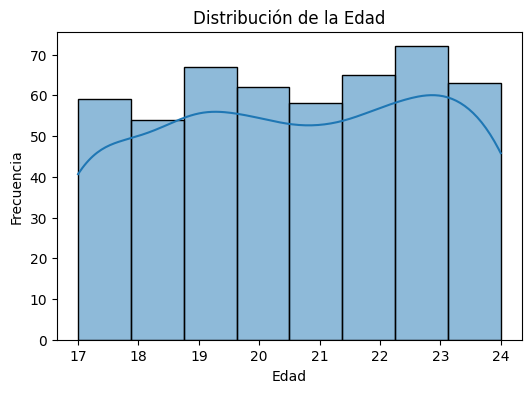

In [10]:
# Distribución de la edad
plt.figure(figsize=(6,4))
sns.histplot(dfSynthetic["edad"], bins=8, kde=True)
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

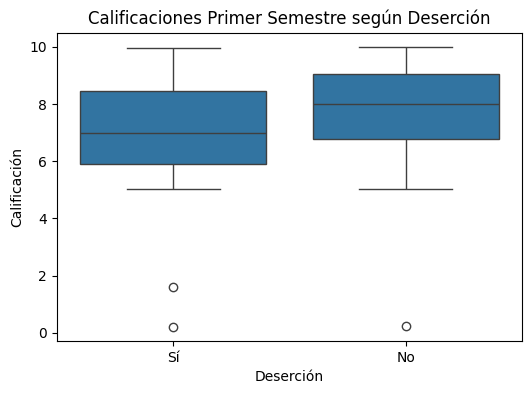

In [11]:
# Boxplot de calificaciones del primer semestre por deserción
plt.figure(figsize=(6,4))
sns.boxplot(x="desercion", y="calificaciones_primer_semestre", data=dfSynthetic)
plt.title("Calificaciones Primer Semestre según Deserción")
plt.xlabel("Deserción")
plt.ylabel("Calificación")
plt.show()

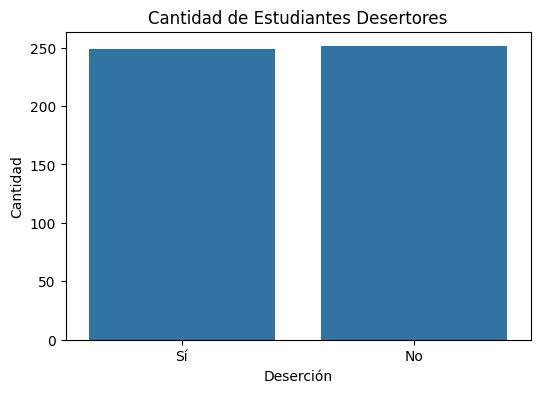

In [12]:
#Cantidad de desercion
plt.figure(figsize=(6,4))
sns.countplot(x="desercion", data=dfSynthetic)
plt.title("Cantidad de Estudiantes Desertores")
plt.xlabel("Deserción")
plt.ylabel("Cantidad")
plt.show()

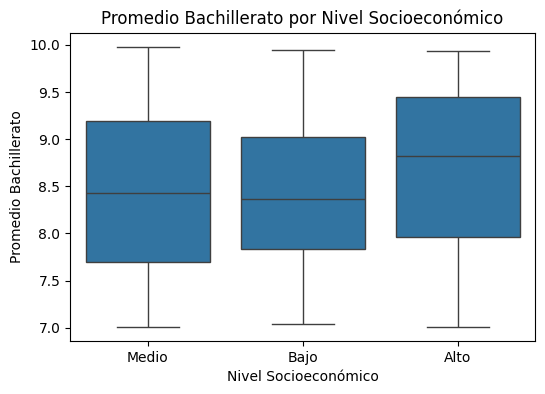

In [ ]:
# Promedio de bachillerato por nivel socioeconómico
plt.figure(figsize=(6,4))
sns.boxplot(x="nivel_socioeconomico", y="promedio_bachillerato", data=dfSynthetic)
plt.title("Promedio Bachillerato por Nivel Socioeconómico")
plt.xlabel("Nivel Socioeconómico")
plt.ylabel("Promedio Bachillerato")
plt.show()

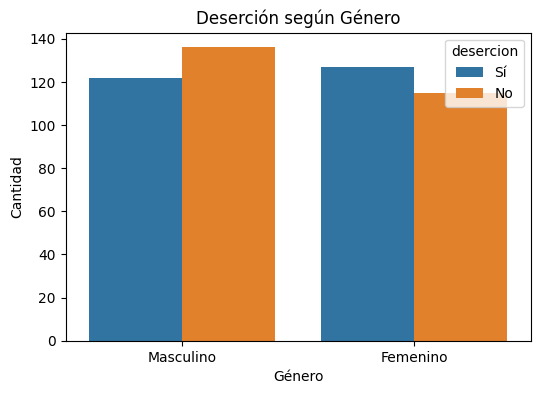

In [ ]:
# Conteo de deserción por género
plt.figure(figsize=(6,4))
sns.countplot(x="genero", hue="desercion", data=dfSynthetic)
plt.title("Deserción según Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

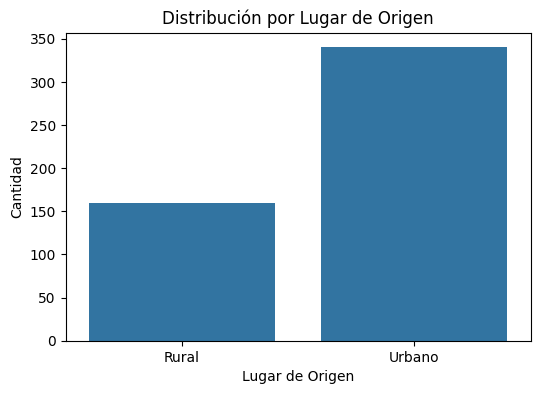

In [ ]:
# Conteo de estudiantes por lugar de origen
plt.figure(figsize=(6,4))
sns.countplot(x="lugar_origen", data=dfSynthetic)
plt.title("Distribución por Lugar de Origen")
plt.xlabel("Lugar de Origen")
plt.ylabel("Cantidad")
plt.show()

##3. Correlation map

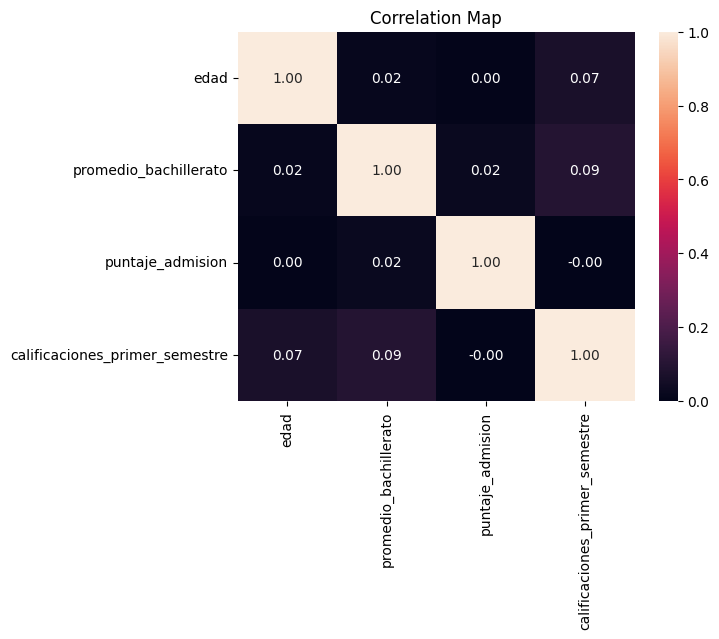

In [ ]:
# Matriz de correlación
correlation_matrix = dfSynthetic.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Map")
plt.show()

##4. Preprocessing and pipelines

In [ ]:
# Definir columnas numéricas y categóricas
numeric_features = ['edad', 'promedio_bachillerato', 'puntaje_admision', 'calificaciones_primer_semestre']
categorical_features = ['genero', 'lugar_origen', 'nivel_socioeconomico', 'tiene_beca', 'tiene_credito','desercion']

# Pipeline para variables numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para variables categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer combinando ambos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# Aplicamos el preprocesador para ejecutar todos los pasos de limpieza y transformación.
preprocessed_data = preprocessor.fit_transform(dfSynthetic)

# Obtener lo nombres después de one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Combinar todas las columnas
all_columns = numeric_features + list(cat_feature_names)

dfSynthetic = pd.DataFrame(preprocessed_data, columns=all_columns)

print(dfSynthetic.head())

       edad  promedio_bachillerato  puntaje_admision  \
0 -1.142988               1.760738          1.238216   
1 -0.266463              -1.100694          0.487468   
2 -0.266463               1.442801         -0.024104   
3  1.486585               0.017973          0.832945   
4  1.486585               0.995335         -1.033959   

   calificaciones_primer_semestre  genero_Femenino  genero_Masculino  \
0                       -1.128803              0.0               1.0   
1                        0.569550              0.0               1.0   
2                        1.137870              1.0               0.0   
3                       -1.399747              1.0               0.0   
4                       -0.619958              0.0               1.0   

   lugar_origen_Rural  lugar_origen_Urbano  nivel_socioeconomico_Alto  \
0                 1.0                  0.0                        0.0   
1                 0.0                  1.0                        0.0   
2          

##5. Train-test split.


In [ ]:
# Separamos features (X) y target (y)
X = dfSynthetic.drop(['desercion_No', 'desercion_Sí'], axis=1)
y = dfSynthetic['desercion_Sí']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (400, 15)
X_test: (100, 15)
y_train: (400,)
y_test: (100,)


##6. 7. 8. Models: Logistic Regression and Decision Tree and Validation

Validación Cruzada (F1-Scores): [0.74698795 0.62650602 0.675      0.73170732 0.64864865]
F1-Score Promedio: 0.69

Métricas en el Conjunto de Prueba:
Accuracy: 0.60
Precision: 0.60
Recall: 0.55
F1-Score: 0.57
Matriz de Confusión:
[[33 18]
 [22 27]]

Validación Cruzada (F1-Scores): [0.6744186  0.53846154 0.5952381  0.58139535 0.54545455]
F1-Score Promedio: 0.59

Métricas en el Conjunto de Prueba:
Accuracy: 0.60
Precision: 0.58
Recall: 0.63
F1-Score: 0.61
Matriz de Confusión:
[[29 22]
 [18 31]]



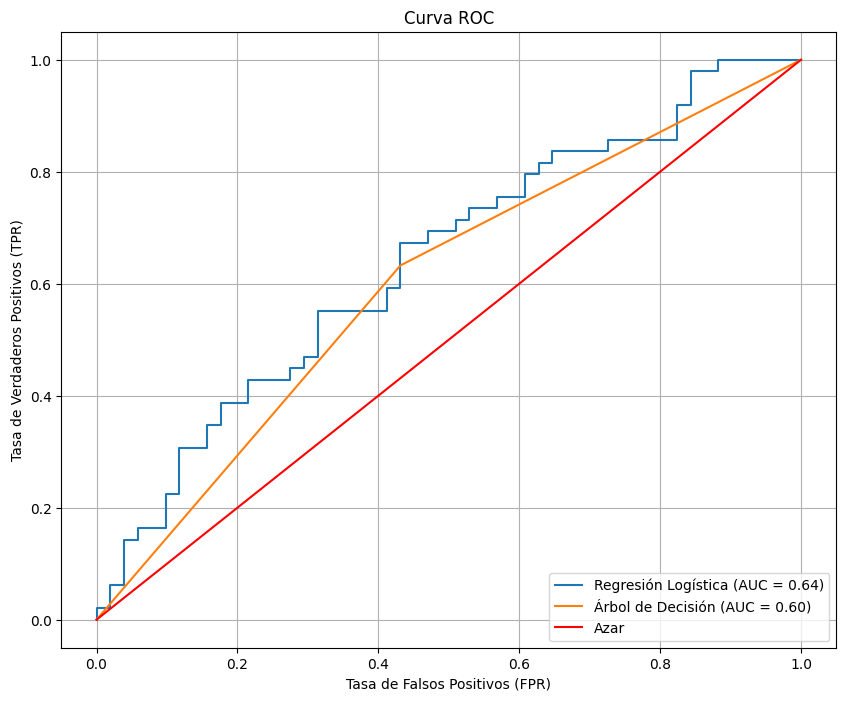

In [ ]:
# Definimos los modelos
models = {
    "Regresión Logística": LogisticRegression(random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42)
}

results = {}
n_folds = 5

for name, model in models.items():
    # Validación Cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring='f1', error_score='raise')
    print(f"Validación Cruzada (F1-Scores): {cv_scores}")
    print(f"F1-Score Promedio: {np.mean(cv_scores):.2f}\n")

    # Entrenamiento y predicción en el conjunto de prueba
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0.5] * len(y_test)

    # Métricas en el conjunto de prueba
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print("Métricas en el Conjunto de Prueba:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("Matriz de Confusión:")
    print(f"{cm}\n")

    # Guardar resultados para la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    results[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

# Graficar Curva ROC
plt.figure(figsize=(10, 8))
for name, data in results.items():
    plt.plot(data['fpr'], data['tpr'], label=f"{name} (AUC = {data['auc']:.2f})")

plt.plot([0, 1], [0, 1], 'r', label='Azar')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Dataset adjunto

##1. Data cleaning.

In [ ]:
#Cargar datos
dfAttached = pd.read_csv('/content/student_dropout.csv')

In [ ]:
# Mostramos las primeras 5 filas del DataFrame
dfAttached.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
# Revisamos los tipos de datos y la presencia de valores nulos en el DataFrame
dfAttached.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
# Calculamos el porcentaje de valores nulos
missing_percent = (dfAttached.isnull().sum() / len(dfAttached)) * 100
print(missing_percent)

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance\t                      0.0
Previous qualification                            0.0
Previous qualification (grade)                    0.0
Nacionality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Admission grade                                   0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder          

##2. Exploratory Data Analysis (EDA)


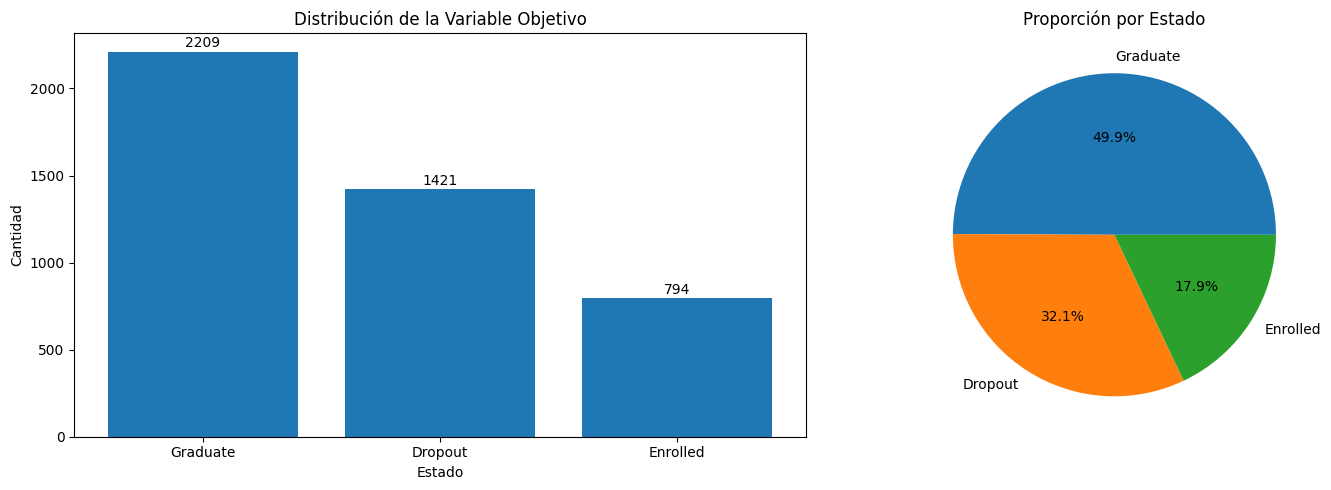

In [ ]:
# Distribución de la variable objetivo
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
target_counts = dfAttached['Target'].value_counts()
bars = plt.bar(target_counts.index, target_counts.values)
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Estado')
plt.ylabel('Cantidad')

for bar, count in zip(bars, target_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{count}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Proporción por Estado')
plt.tight_layout()
plt.show()

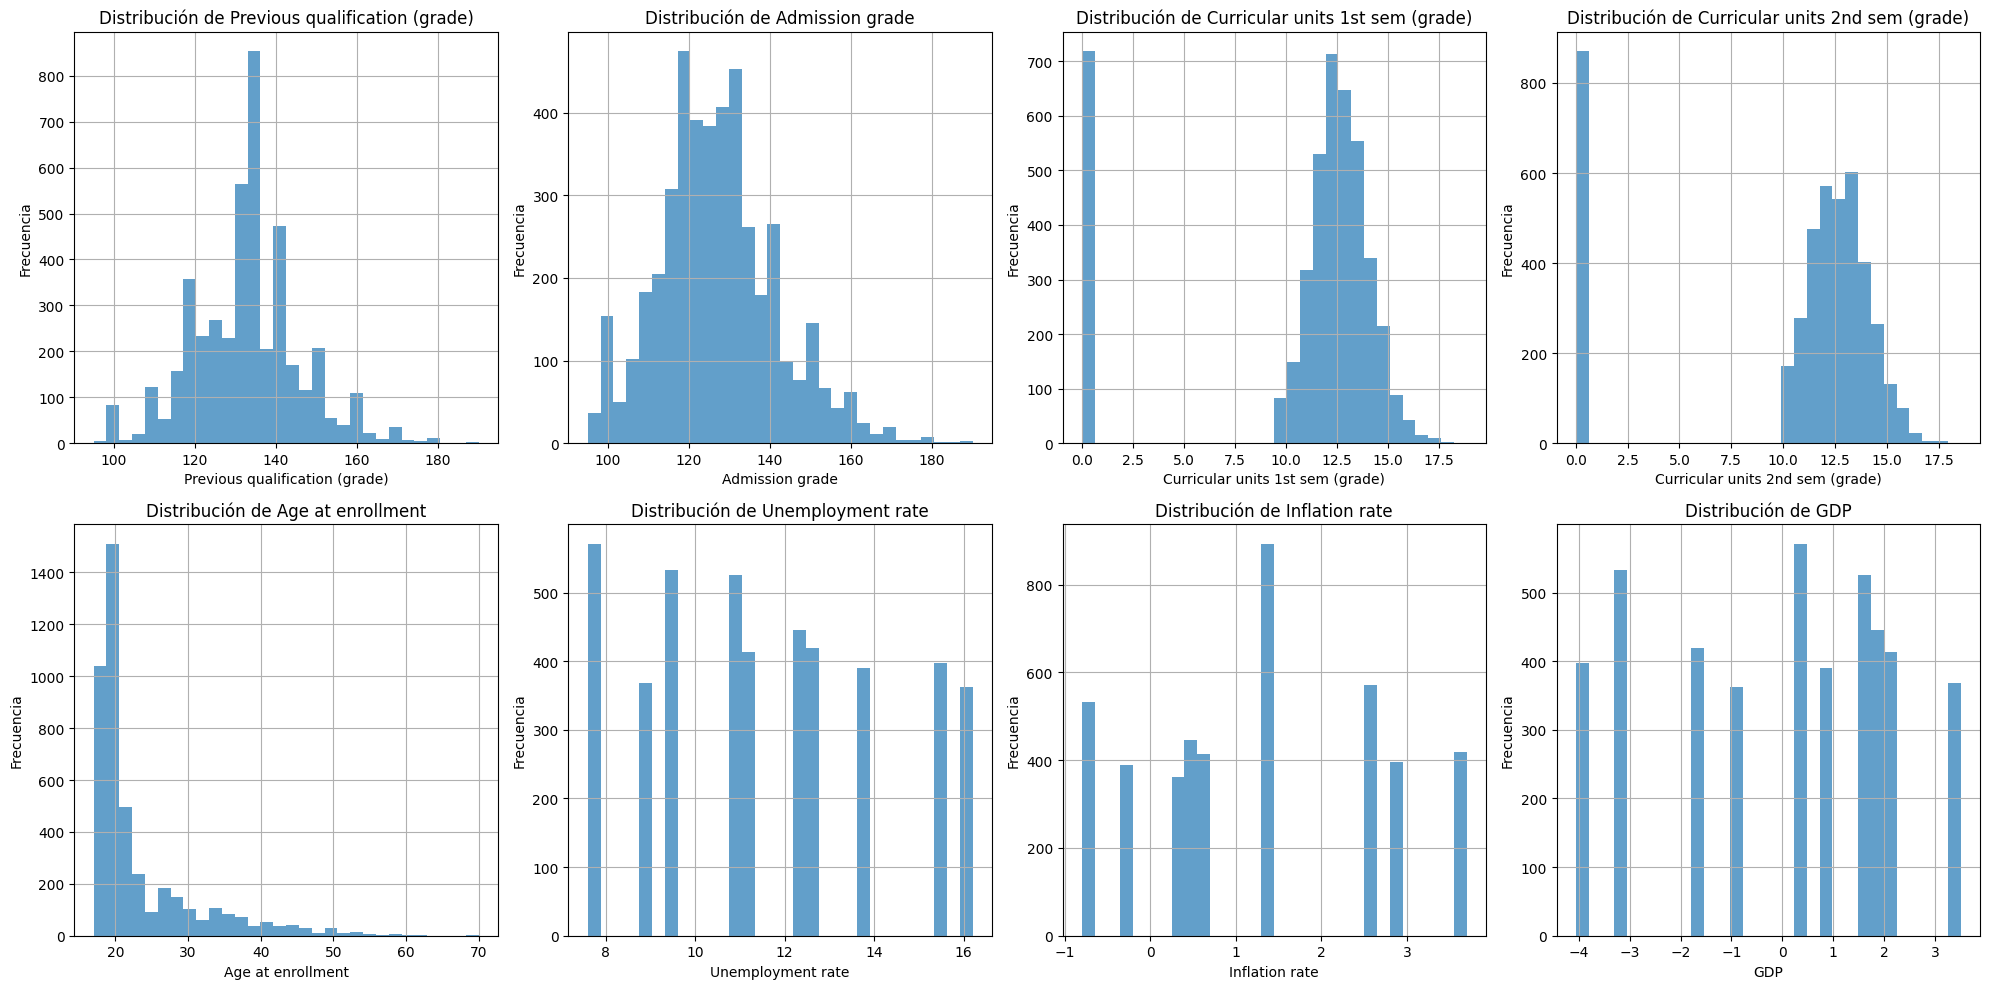

In [ ]:
# Histogramas de variables numéricas clave
numeric_vars = ['Previous qualification (grade)', 'Admission grade',
                'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
                'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, var in enumerate(numeric_vars):
    dfAttached[var].hist(bins=30, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

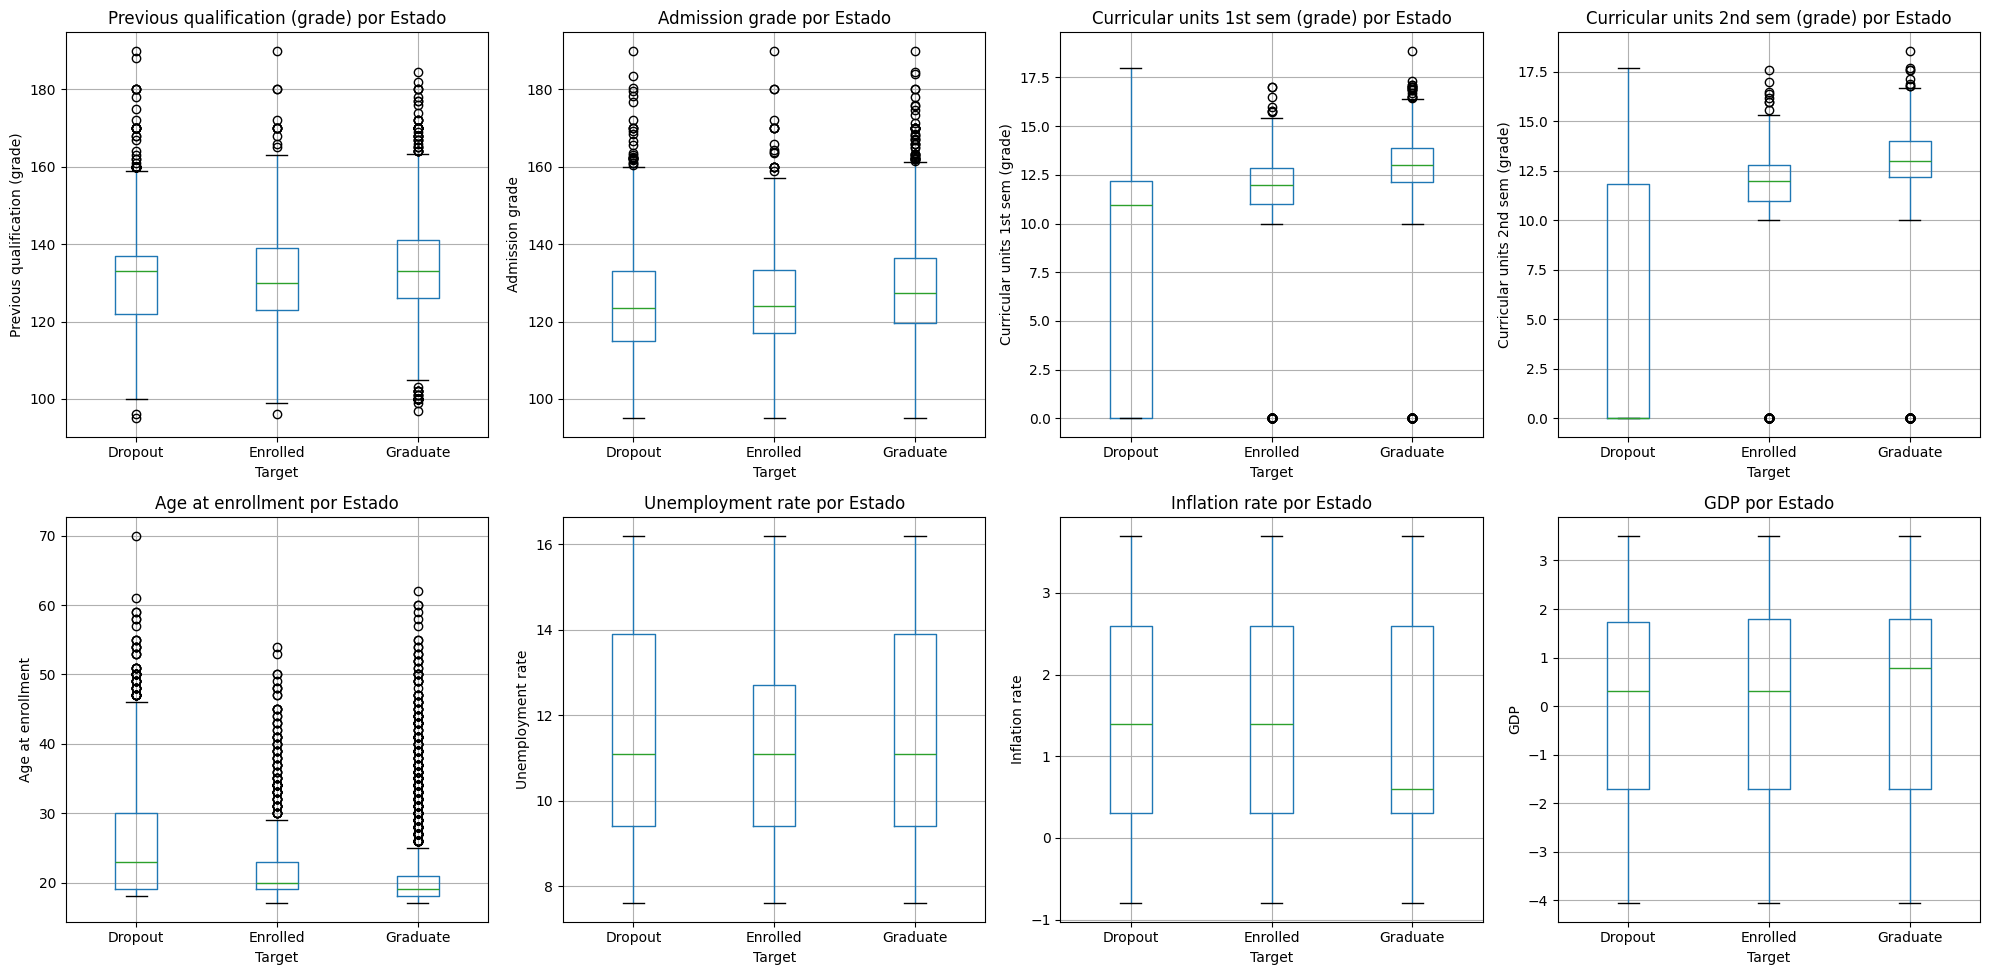

In [ ]:
# Boxplots de variables numéricas por estado
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, var in enumerate(numeric_vars):
    dfAttached.boxplot(column=var, by='Target', ax=axes[i])
    axes[i].set_title(f'{var} por Estado')
    axes[i].set_ylabel(var)
plt.suptitle('')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3929592329.py:14: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


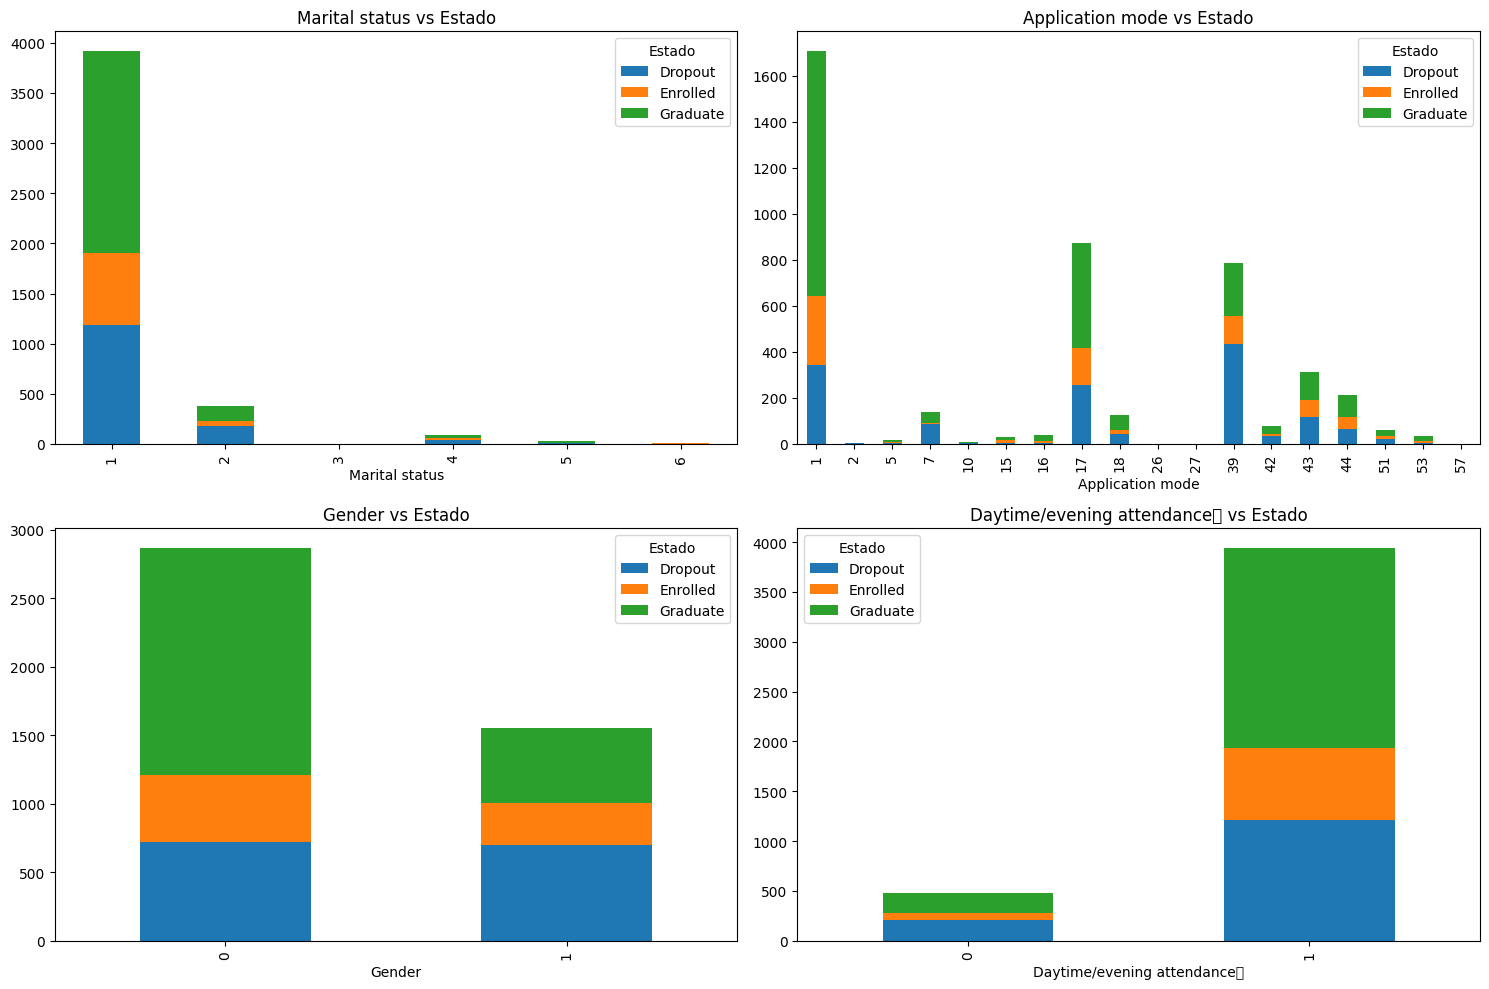

In [ ]:
# Variables categóricas vs estado
categorical_vars = ['Marital status', 'Application mode', 'Gender', 'Daytime/evening attendance\t']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, var in enumerate(categorical_vars):
    cross_tab = pd.crosstab(dfAttached[var], dfAttached['Target'])
    cross_tab.plot(kind='bar', ax=axes[i], stacked=True)
    axes[i].set_title(f'{var} vs Estado')
    axes[i].set_xlabel(var)
    axes[i].legend(title='Estado')
    axes[i].tick_params(axis='x')
plt.tight_layout()
plt.show()

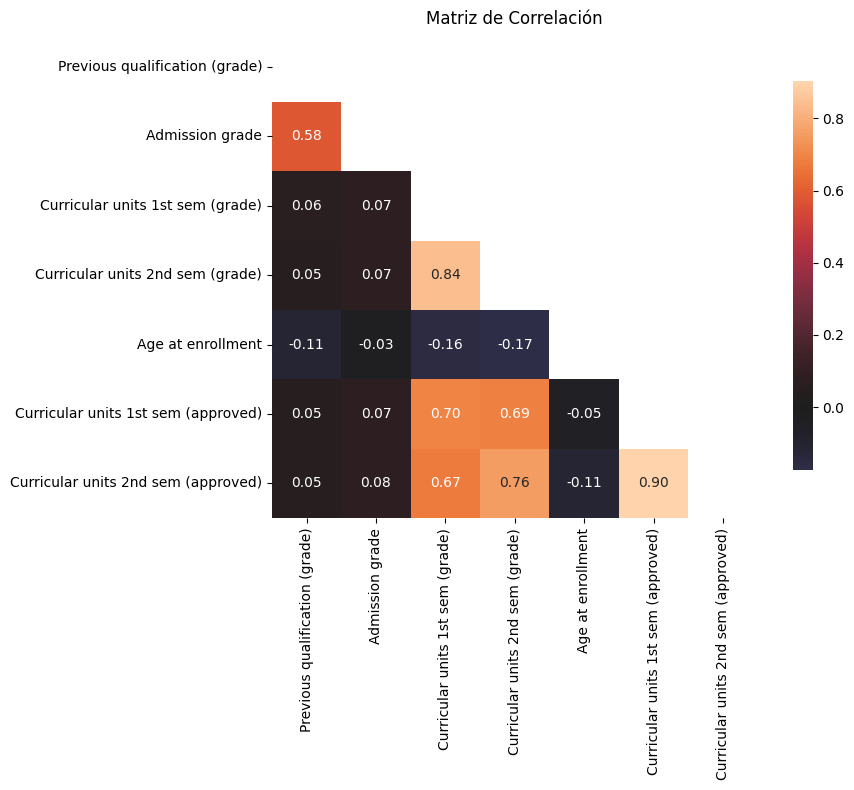

In [ ]:
# Matriz de correlación
corr_vars = ['Previous qualification (grade)', 'Admission grade',
             'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
             'Age at enrollment', 'Curricular units 1st sem (approved)',
             'Curricular units 2nd sem (approved)']

plt.figure(figsize=(10, 8))
correlation_matrix = dfAttached[corr_vars].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': .8})
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

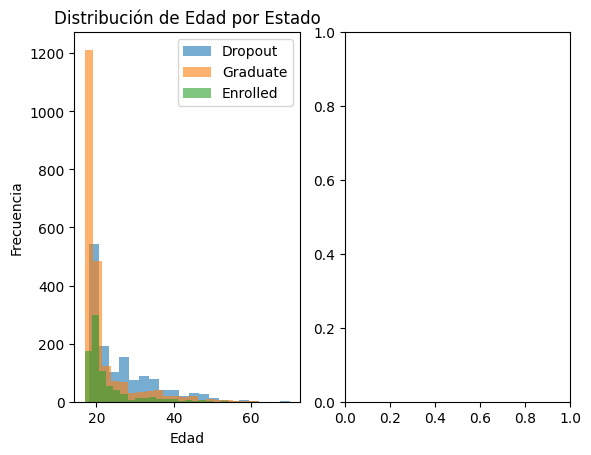

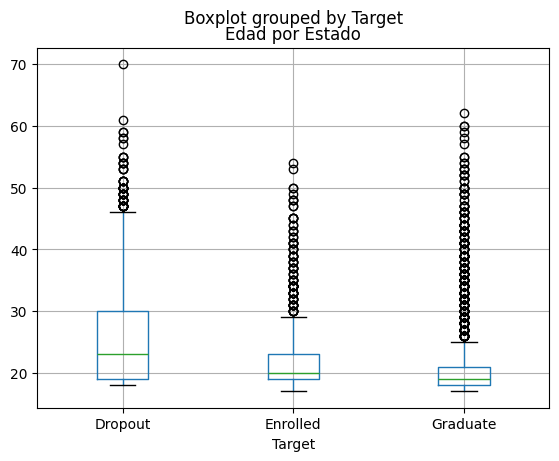

In [ ]:
# Análisis de edad por estado
plt.subplot(1, 2, 1)
for target in dfAttached['Target'].unique():
    subset = dfAttached[dfAttached['Target'] == target] # Corrected df to dfAttached
    plt.hist(subset['Age at enrollment'], alpha=0.6, label=target, bins=20)
plt.title('Distribución de Edad por Estado')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
dfAttached.boxplot(column='Age at enrollment', by='Target')
plt.title('Edad por Estado')
plt.show()

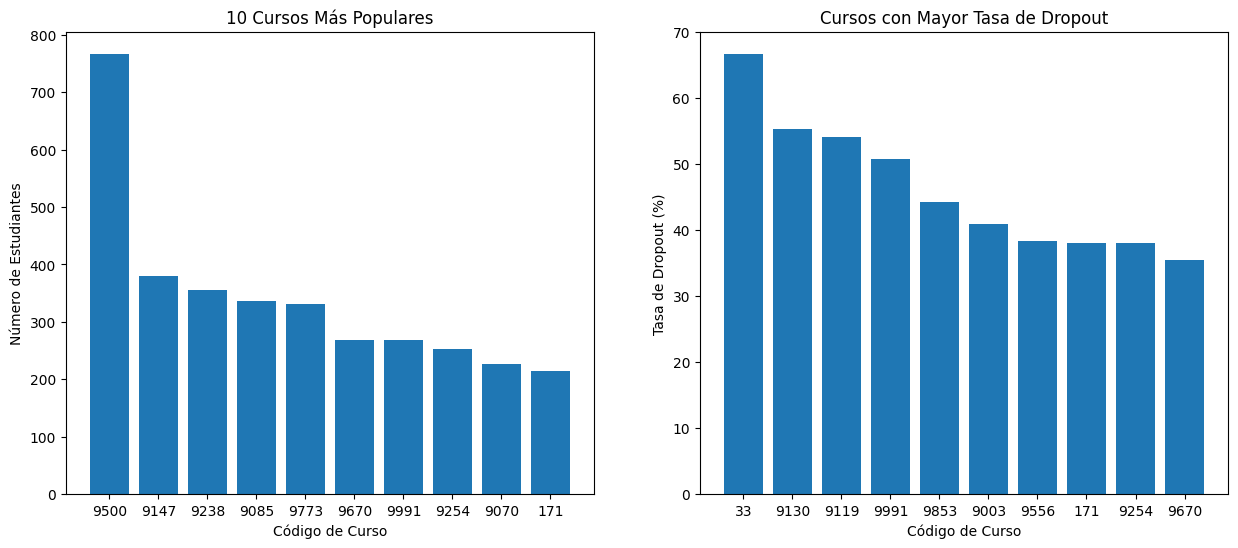

In [ ]:
# Cursos más populares y tasas de dropout
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
top_courses = dfAttached['Course'].value_counts().head(10)
plt.bar(range(len(top_courses)), top_courses.values)
plt.title('10 Cursos Más Populares')
plt.xlabel('Código de Curso')
plt.ylabel('Número de Estudiantes')
plt.xticks(range(len(top_courses)), top_courses.index)

plt.subplot(1, 2, 2)
course_dropout_rates = dfAttached.groupby('Course')['Target'].apply(
    lambda x: (x == 'Dropout').mean() * 100
).sort_values(ascending=False).head(10)
plt.bar(range(len(course_dropout_rates)), course_dropout_rates.values)
plt.title('Cursos con Mayor Tasa de Dropout')
plt.xlabel('Código de Curso')
plt.ylabel('Tasa de Dropout (%)')
plt.xticks(range(len(course_dropout_rates)), course_dropout_rates.index)

plt.show()

##4. Preprocessing and pipelines

In [ ]:
# Definir columnas numéricas y categóricas basándonos en el dataset
numeric_features = [
    'Application order',
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

categorical_features = [
    'Marital status',
    'Application mode',
    'Course',
    'Daytime/evening attendance\t',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'International'
]

# Variable objetivo
target_feature = 'Target'

# Pipeline para variables numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para variables categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ColumnTransformer combinando ambos pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Separar características y variable objetivo
X = dfAttached.drop(columns=[target_feature])
y = dfAttached[target_feature]

# Aplicar el preprocesamiento
X_processed = preprocessor.fit_transform(X)

# Obtener los nombres de las columnas después del preprocesamiento
numeric_columns = numeric_features
categorical_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Combinar todos los nombres de columnas
all_columns = list(numeric_columns) + list(categorical_columns)

# Crear DataFrame con los datos preprocesados
dfAttached = pd.DataFrame(X_processed, columns=all_columns)

# Añadir la variable objetivo al DataFrame procesado
dfAttached[target_feature] = y.values

dfAttached.head()

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),...,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1,Target
0,2.490896,-0.804841,0.022229,-0.430363,-0.300813,-2.528560,-1.986068,-1.521257,-2.197102,-0.282442,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Dropout
1,-0.554068,2.076819,1.071926,-0.562168,-0.300813,-0.109105,-0.550192,0.418050,0.693599,-0.282442,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,Graduate
2,2.490896,-0.804841,-0.150419,-0.562168,-0.300813,-0.109105,-1.986068,-1.521257,-2.197102,-0.282442,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,Dropout
3,0.207173,-0.804841,-0.509526,-0.430363,-0.300813,-0.109105,-0.071567,0.418050,0.575611,-0.282442,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,Graduate
4,-0.554068,-2.473171,1.002867,2.864765,-0.300813,-0.109105,0.167746,0.094832,0.349468,-0.282442,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,Graduate


##5. Train-test split.


In [ ]:
# Separar features (X) y target (y)
X = dfAttached.drop(columns=['Target'])
y = dfAttached['Target']

# Encode la variable target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Imprimir las etiquetas codificadas y su mapeo
print("\nEncoded target labels:", label_encoder.classes_)
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Shape of X_train: (3539, 253)
Shape of X_test: (885, 253)
Shape of y_train: (3539,)
Shape of y_test: (885,)

Encoded target labels: ['Dropout' 'Enrolled' 'Graduate']
Mapping: {'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}


##6. 7. 8. Models: Logistic Regression and Decision Tree and Validation

--- Modelo: Regresión Logística ---
Validación Cruzada (Weighted F1-Scores): [0.74765978 0.77350962 0.77261988 0.77078707 0.77474827]
Weighted F1-Score Promedio: 0.77

Métricas en el Conjunto de Prueba:
Accuracy: 0.76
Precision: 0.75
Recall: 0.76
Weighted F1-Score: 0.75
Matriz de Confusión:
[[213  32  39]
 [ 42  59  58]
 [ 19  19 404]]

--- Modelo: Árbol de Decisión ---
Validación Cruzada (Weighted F1-Scores): [0.67519018 0.67976145 0.67287276 0.67589097 0.6744776 ]
Weighted F1-Score Promedio: 0.68

Métricas en el Conjunto de Prueba:
Accuracy: 0.68
Precision: 0.69
Recall: 0.68
Weighted F1-Score: 0.68
Matriz de Confusión:
[[201  51  32]
 [ 49  61  49]
 [ 44  60 338]]



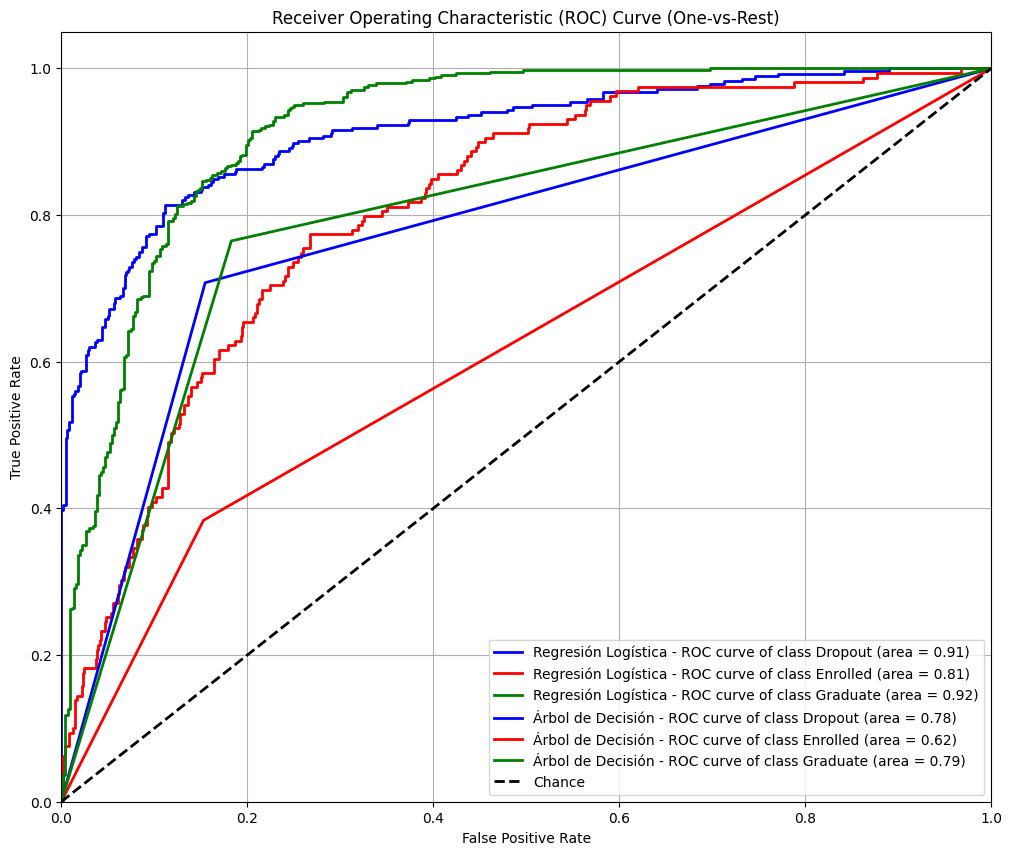

In [ ]:
# Definimos los modelos
models = {
    "Regresión Logística": LogisticRegression(random_state=42, max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42)
}

results = {}
n_folds = 5
n_classes = len(np.unique(y_train))

for name, model in models.items():
    print(f"--- Modelo: {name} ---")

    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring='f1_weighted')
    print(f"Validación Cruzada (Weighted F1-Scores): {cv_scores}")
    print(f"Weighted F1-Score Promedio: {np.mean(cv_scores):.2f}\n")

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Hacer predicciones con test
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Evaluar metrícas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print("Métricas en el Conjunto de Prueba:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Weighted F1-Score: {f1:.2f}")
    print("Matriz de Confusión:")
    print(f"{cm}\n")

    # Guardar resultados para la curva ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_proba[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    results[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc, 'n_classes': n_classes}


# Graficar Curva ROC
plt.figure(figsize=(12, 10))
colors = ['blue', 'red', 'green']

for name, data in results.items():
    for i in range(data['n_classes']):
        plt.plot(data['fpr'][i], data['tpr'][i], color=colors[i], lw=2,
                 label=f'{name} - ROC curve of class {label_encoder.classes_[i]} (area = {data["auc"][i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()